In [24]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-11-19 04:04:45--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-11-19 04:04:45--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   200MB/s    in 

In [25]:
import os, zipfile

local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [26]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'King', 'Knight', 'Queen', 'Pawn', 'Bishop']

In [27]:
print('Total Gambar Bishop :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('Total Gambar Knight :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('Total Gambar King :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('Total Gambar Pawn :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('Total Gambar Rook :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('Total Gambar Queen :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))

a = len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop'))
b = len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight'))
c = len(os.listdir('/tmp/Chessman-image-dataset/Chess/King'))
d = len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn'))
e = len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook'))
f = len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen'))

print('Total Keseluruh Gambar :', a + b + c + d + e + f)

Total Gambar Bishop : 87
Total Gambar Knight : 106
Total Gambar King : 76
Total Gambar Pawn : 107
Total Gambar Rook : 102
Total Gambar Queen : 78
Total Keseluruh Gambar : 556


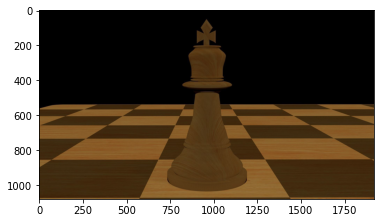

In [28]:
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1
)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs = {}):
#     if(logs.get('val_accuracy') > 0.96):
#       print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96%!")
#       self.model.stop_training = True

# callbacks = myCallback()

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

model.layers[0].trainable = False

In [32]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50,
    verbose = 2
    # callbacks = [callbacks]
)

Epoch 1/50
63/63 - 22s - loss: 8.5559 - accuracy: 0.4128 - val_loss: 3.7100 - val_accuracy: 0.5385 - 22s/epoch - 350ms/step
Epoch 2/50
63/63 - 11s - loss: 2.0508 - accuracy: 0.6733 - val_loss: 2.2504 - val_accuracy: 0.6346 - 11s/epoch - 172ms/step
Epoch 3/50
63/63 - 11s - loss: 1.0757 - accuracy: 0.7475 - val_loss: 1.2382 - val_accuracy: 0.7692 - 11s/epoch - 175ms/step
Epoch 4/50
63/63 - 10s - loss: 0.7514 - accuracy: 0.8236 - val_loss: 0.7182 - val_accuracy: 0.7885 - 10s/epoch - 162ms/step
Epoch 5/50
63/63 - 10s - loss: 0.7311 - accuracy: 0.8016 - val_loss: 1.0139 - val_accuracy: 0.7115 - 10s/epoch - 161ms/step
Epoch 6/50
63/63 - 10s - loss: 0.4762 - accuracy: 0.8597 - val_loss: 1.3983 - val_accuracy: 0.6731 - 10s/epoch - 163ms/step
Epoch 7/50
63/63 - 11s - loss: 0.5081 - accuracy: 0.8898 - val_loss: 1.0706 - val_accuracy: 0.7885 - 11s/epoch - 179ms/step
Epoch 8/50
63/63 - 10s - loss: 0.6509 - accuracy: 0.8758 - val_loss: 1.3727 - val_accuracy: 0.7308 - 10s/epoch - 164ms/step
Epoch 9/

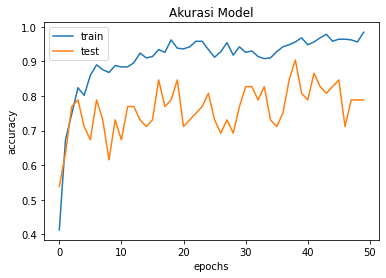

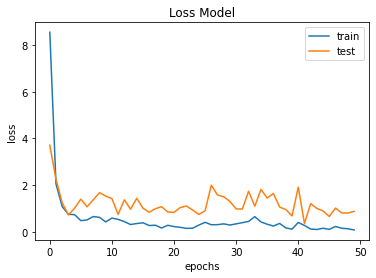

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()